In [ ]:
    from netCDF4 import Dataset
    import numpy as np
    nc_file = Dataset('/home/mxi235/data/CBA_full/boussinesq.nc', 'r')

In [42]:
from netCDF4 import Dataset
import numpy as np

# 读取 NetCDF 数据
nc = Dataset('/home/mxi235/data/CBA_full/boussinesq.nc', "r")

# 读取 u, v
u = nc.variables['u'][:]
v = nc.variables['v'][:]
print(u.shape, v.shape)  # 输出形状确认

# # transpose u 和 v
# u = np.transpose(u, (2,1,0))  # 转换
# v = np.transpose(v, (2,1,0))  # 转换
# print(u.shape, v.shape)  # 输出形状确认

nc.close()

# 转为 float32，填补缺失值（如果有）
u_filled = u.filled(0).astype(np.float32) if np.ma.isMaskedArray(u) else u.astype(np.float32)
v_filled = v.filled(0).astype(np.float32) if np.ma.isMaskedArray(v) else v.astype(np.float32)
print(u_filled.shape, v_filled.shape)  # 输出形状确认

# # 写入二进制文件
u_filled.tofile("/home/mxi235/data/CBA_full/u.bin")
v_filled.tofile("/home/mxi235/data/CBA_full/v.bin")




(2001, 450, 150) (2001, 450, 150)
(2001, 450, 150) (2001, 450, 150)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#read data
data_u = np.fromfile("/home/mxi235/data/CBA_full/u_component.bin", dtype=np.float32).reshape((2001,450,150))
data_v = np.fromfile("/home/mxi235/data/CBA_full/v_component.bin", dtype=np.float32).reshape((2001,450,150))

# 选择时间步
time_step = 1000  # 选择第 1000 个时间步
u_slice = data_u[time_step, :, :]  # 选择 u 的第 1000 个时间步
v_slice = data_v[time_step, :, :]  # 选择 v 的第 1000 个时间步
magnitude = np.sqrt(u_slice**2 + v_slice**2)





(450, 150) (450, 150) (450, 150)


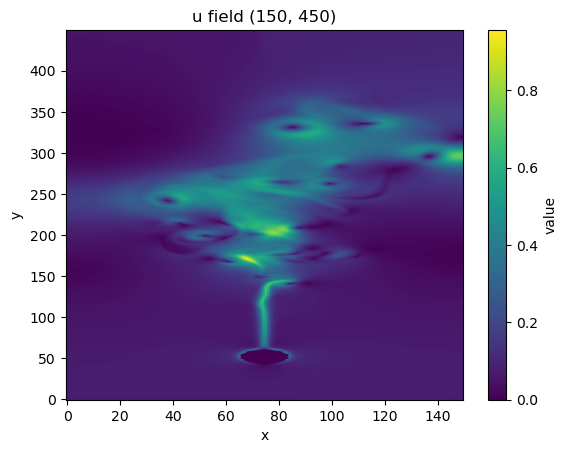

In [9]:
print(u_slice.shape, v_slice.shape, magnitude.shape)
plt.imshow(magnitude, origin='lower', aspect='auto')
plt.colorbar(label='value')
plt.title("u field (150, 450)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()